In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

%matplotlib inline

In [2]:
reps_2020 = pd.read_csv('../data/reps_2020.csv')

In [34]:
reps_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   candidate  884 non-null    object
 1   party      894 non-null    object
 2   state      894 non-null    object
 3   district   894 non-null    int64 
 4   incumbent  386 non-null    object
 5   winner     431 non-null    object
 6   raised     894 non-null    int64 
 7   spent      894 non-null    int64 
 8   year       894 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 63.0+ KB


### d. How often does the incumbent candidate win a race?

In [29]:
winners = reps_2020.groupby(['candidate', 'winner']).count()

winners

,,party,state,district,incumbent,raised,spent,year
candidate,winner,,,,,,,
Abigail Spanberger,Winner,1,1,1,1,1,1,1
Adam Kinzinger,Winner,1,1,1,1,1,1,1
Adam Schiff,Winner,1,1,1,1,1,1,1
Adam Smith,Winner,1,1,1,1,1,1,1
Adrian Smith,Winner,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
William Timmons,Winner,1,1,1,1,1,1,1
Young Kim,Winner,1,1,1,0,1,1,1
Yvette D Clarke,Winner,1,1,1,1,1,1,1


In [31]:
winners['incumbent'].value_counts(normalize = True)

1    0.862471
0    0.137529
Name: incumbent, dtype: float64

### Reading in historic data

In [35]:
all_years = pd.read_csv('../data/reps_2010.csv')

In [37]:
all_years = all_years.append(pd.read_csv('../data/reps_2012.csv'))

In [38]:
all_years = all_years.append(pd.read_csv('../data/reps_2014.csv'))

In [39]:
all_years = all_years.append(pd.read_csv('../data/reps_2016.csv'))

In [40]:
all_years = all_years.append(pd.read_csv('../data/reps_2018.csv'))

In [41]:
all_years = all_years.append(pd.read_csv('../data/reps_2020.csv'))

### Looking at Mean vs Median money raised

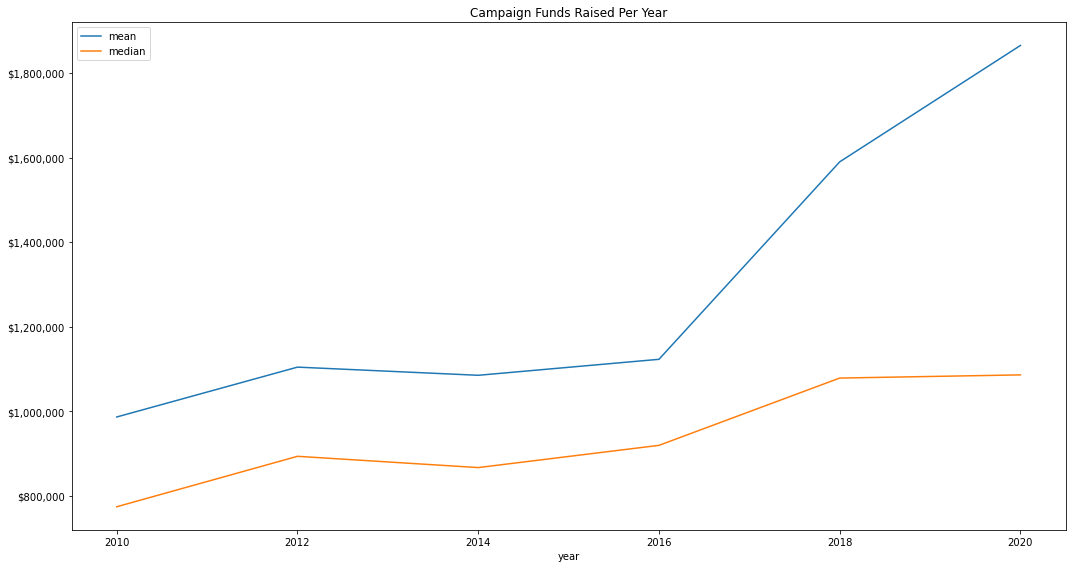

In [247]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

all_years.groupby('year').mean('raised')['raised'].plot(label = 'mean', ax = ax)

all_years.groupby('year').median('raised')['raised'].plot(label = 'median', ax = ax)

plt.title('Campaign Funds Raised Per Year')

plt.legend()

plt.ticklabel_format(style='plain')
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick);

### Looking at total raised by year

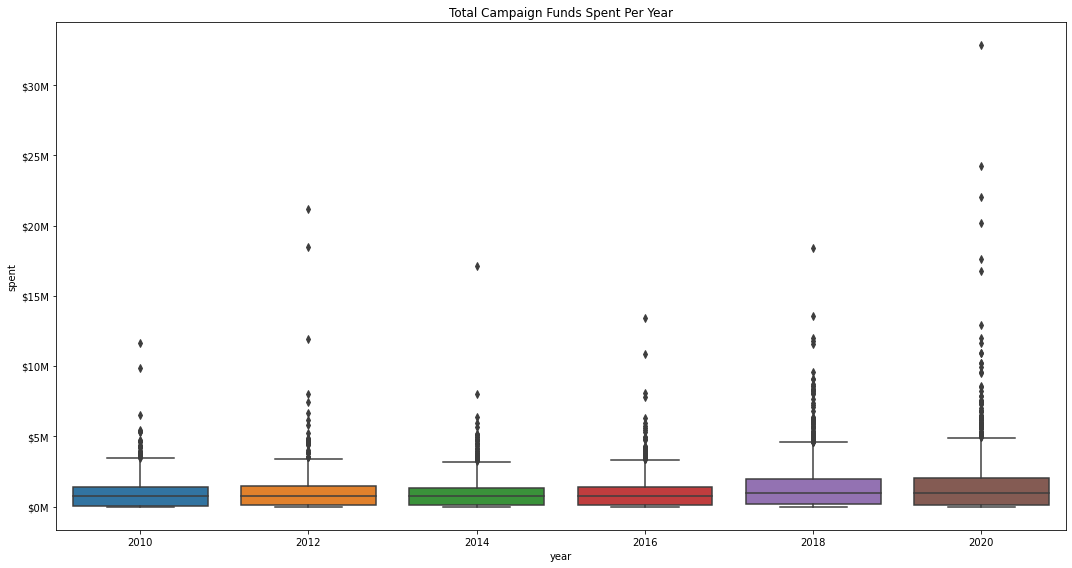

In [217]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

sns.boxplot(data = all_years,
           x = 'year',
           y = 'spent')

plt.title('Total Campaign Funds Spent Per Year')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x/1000000) + 'M'));
# #plt.ticklabel_format(style='plain')
# fmt = '${x:,.0f}'
# tick = mtick.StrMethodFormatter(fmt)
# ax.yaxis.set_major_formatter(tick);

In [66]:
all_years[(all_years['party'] == 'D') | (all_years['party'] == 'R')]

,candidate,party,state,district,incumbent,winner,raised,spent,year
0,Jo Bonner,R,AL,1,Incumbent,Winner,913053,1101701,2010
2,Bobby Bright,D,AL,2,Incumbent,NaN,1413032,1435526,2010
3,Martha Roby,R,AL,2,NaN,Winner,1253557,1240276,2010
4,Mike D Rogers,R,AL,3,Incumbent,Winner,1141732,943060,2010
5,Stephen Graham Segrest,D,AL,3,NaN,NaN,8750,8750,2010
...,...,...,...,...,...,...,...,...,...
889,Tricia Zunker,D,WI,7,NaN,NaN,1261957,1232690,2020
890,Mike Gallagher,R,WI,8,Incumbent,Winner,3202905,2841801,2020
891,Amanda Stuck,D,WI,8,NaN,NaN,416978,399916,2020
892,Liz Cheney,R,WY,1,Incumbent,Winner,3003883,3060167,2020


### Looking at totals raised by parties by year

<Figure size 1080x576 with 0 Axes>

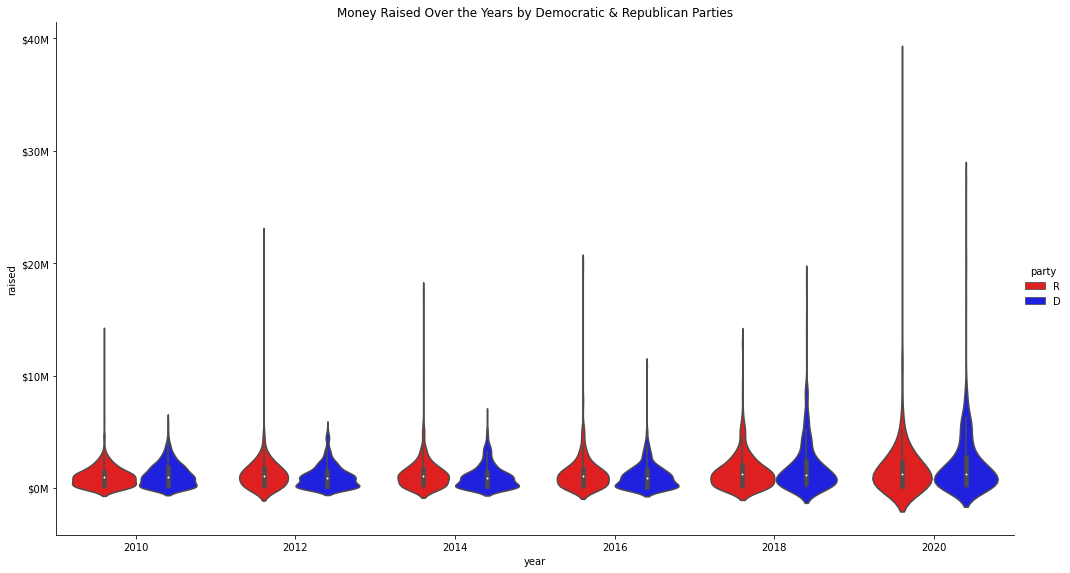

In [269]:
two_parties= all_years[(all_years['party'] == 'D') | (all_years['party'] == 'R')]

ax = plt.figure(figsize = (15,8))

g = sns.catplot(data = two_parties,
                x = 'year',
                y = 'raised',
                hue = 'party',
                kind = 'violin',
                palette = ['red', 'blue'],
                height = 8,
                aspect = 1.75)

plt.ticklabel_format(style='plain', axis = 'y')
plt.title('Money Raised Over the Years by Democratic & Republican Parties')

# fmt = '${x:,.0f}'
# tick = mtick.StrMethodFormatter(fmt)
# for ax in g.axes.flat:
#     ax.yaxis.set_major_formatter(tick)
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x/1000000) + 'M'));

### Looking at Mean and Median raised by Republican and Democrat parties over years

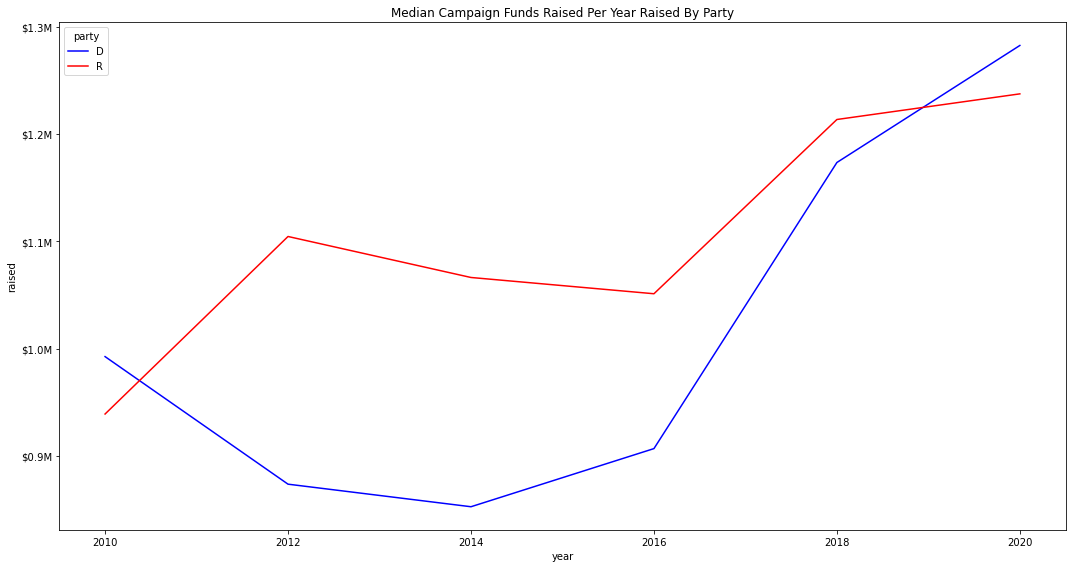

In [225]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

sns.lineplot(data = two_parties.groupby(['party','year']).median('raised'),
            x = 'year',
            y = 'raised',
            hue = 'party',
            palette = ['blue', 'red'])

plt.title('Median Campaign Funds Raised Per Year Raised By Party')

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '${:,.1f}'.format(x/1000000) + 'M'));

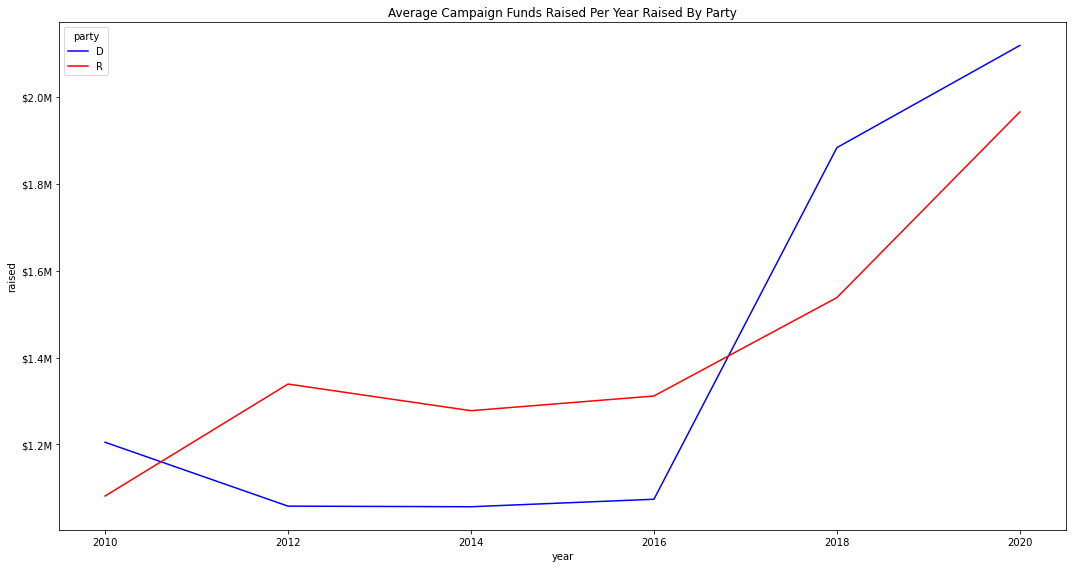

In [228]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

sns.lineplot(data = two_parties.groupby(['party','year']).mean('raised'),
            x = 'year',
            y = 'raised',
            hue = 'party',
            palette = ['blue', 'red'])

plt.title('Average Campaign Funds Raised Per Year Raised By Party')

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '${:,.1f}'.format(x/1000000) + 'M'));

In [205]:
two_parties.groupby(['party','year']).sum('raised')

district     raised      spent
party year                                
D     2010      4010  468708220  487241274
      2012      4125  412519743  404815964
      2014      3957  398250320  369773180
      2016      4139  401519221  352177051
      2018      4437  815555124  763836991
      2020      4445  898387575  805379041
R     2010      4195  460508807  425676841
      2012      3833  538249289  503303446
      2014      3695  495711488  444213687
      2016      3450  481284651  455206847
      2018      3666  556759477  556407249
      2020      3855  762736206  693689491

In [249]:
two_parties_tn = two_parties[two_parties['state'] == 'TN']

<Figure size 1080x576 with 0 Axes>

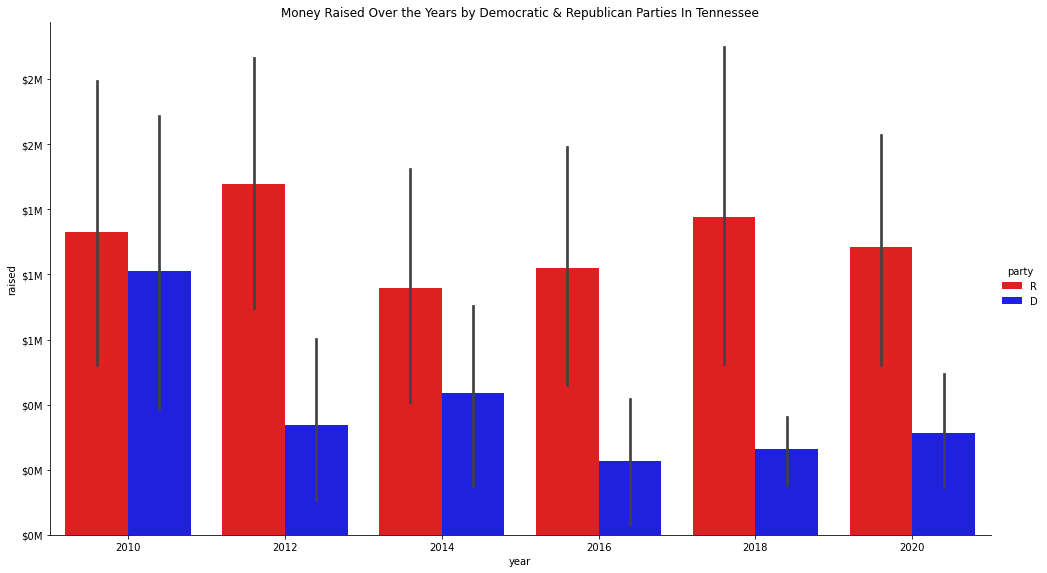

In [252]:
two_parties= all_years[(all_years['party'] == 'D') | (all_years['party'] == 'R')]

ax = plt.figure(figsize = (15,8))

g = sns.catplot(data = two_parties_tn,
                x = 'year',
                y = 'raised',
                hue = 'party',
                kind = 'bar',
                palette = ['red', 'blue'],
                height = 8,
                aspect = 1.75)

plt.ticklabel_format(style='plain', axis = 'y')
plt.title('Money Raised Over the Years by Democratic & Republican Parties In Tennessee')

for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x/1000000) + 'M'));

In [271]:
max_raised = two_parties.groupby(['state', 'party']).max('raised')

In [264]:
max_raised.columns

Index(['district', 'raised', 'spent', 'year'], dtype='object')

In [267]:
max_raised[max_raised['raised'] == max_raised['raised'].max()]

,,district,raised,spent,year
state,party,,,,
LA,R,6,37262827,32830607,2020


In [272]:
max_raised['raised'] - max_raised['spent']

state  party
AK     D           6245
       R         132453
AL     D         464507
       R        -179497
AR     D           3730
                 ...   
WI     R        6418552
WV     D           6923
       R        -551694
WY     D           1946
       R         -56284
Length: 100, dtype: int64